The goal of this notebook is to devise experiments that show the efficacy of QDA + RF in settings where the appropraite assumptions hold and to provide an examle (or two) where the method 'fails'. The most effective way to do this is by telling a story with the order of the experiments. To achieve that end, i will begin with a simple setting with no networks involved. 

Let $ \mathcal{M}(n, \pi) $ denote a multinomial trial with probability vector $ \pi $. For the ease of exposition, suppose $ \pi \in \Delta^{1} $, or that there are two classes. Suppose $ S =$ the number of ones. Then draw $ S $ iid samples from $ N(\mu_{1}, \Sigma_{1}) $ and $ n - S $ iid samples from $ N(\mu_{2}, \Sigma_{2}) $. Let $ \{X_{i}\}_{i = 1}^{m_{1}} \cup \{X_{i}\}_{i = S + 1}^{m_{2}} $ be a set of training data with known class labels and let $ m = m_{1} + m_{2} $. In the clasification setting, the goal is to build a function from $ \mathcal{X} $ to $ [2] $ that minimize the number of misclassified objects. In the current setting with $ \mu_{u}, \Sigma_{u} $ known and $ \Sigma_{1} \neq \Sigma_{2} $, Fisher proved the optimality of the quadratic discriminant boundary that effectively classifies an unlabeled object X as class one if $ \pi_{1} f(X; \mu_{1}, \Sigma_{1}) > \pi_{2} f(X; \mu_{2}, \Sigma_{2}) $ and class two otherwise. In practice the parameters for each normal disttribution are unknown and need to be estimated. This leads to the natural Bayes' plug-in classifier that classifies an unlabled object X as class one if $ \frac{m_{1}}{m} f(X; \hat{\mu}_{1}, \hat{\Sigma}_{1}) > \frac{m_{2}}{m} f(X; \hat{\mu}_{2}, \hat{\Sigma}_{2}) $ and class two otherwise, where the hats denote parameters estimated from the available training data. The optimality of the presented classifier is only under the setting in which $ \{X_{i}\}_{i = 1}^{n} $ are actually normally distributed. Otherwise, for large $ m $, the bias induced by assuming normality is nonzero and ges amplified as $ m $ increases due to a decrease in variance.  This phenomena is known as the bias-variance tradeoff and its effect is notorious for finite $ m $ [cite?!?!].

On the otherside of the coin are classifiers that make no distribution assumptions and are still, in the limit, optimal. These classifiers are said to be universally consistent and are quite rare [cite Knn, svm, rf, nn, etc.]. The guaranteed convergence for any underlying distribution comes with a price of high variance for 'small' $ m $ [cite bad empirical results using knn, svm, etc.], with negative results like in [DGL ch 7]. With that said, the use of these classifiers are widespread and, for Random Forests in particular, a significant amount of recent work has been done to optimize [cite!!!] and understand when these algorithms can 'fail' [von Luxburg, others!].

Posterior estimation?

In [6]:
from covariates_gclass import *
# import numpy as np
# import matplotlib.pyplot as plt
# import graspy
# from sklearn.ensemble import RandomForestClassifier as RF
# from sklearn.neighbors import KNeighborsClassifier as KNN
# from scipy.stats import multivariate_normal as mvn, beta, norm
from tqdm import tqdm as tqdm
# from graspy.embed import AdjacencySpectralEmbed as ASE
# from graspy.simulations import sbm
import seaborn as sns
sns.set()

%matplotlib inline

 The first setting we consider is when $ X | Y = 1 \sim N([1,1], I_{2}) $ and $ X | Y = 2 \sim N([-1, -1], I_{2}) $ and $ Z | Y = 1 \sim Unif[0, 0.75]^{2} $ and $ Z | Y = 2 \sim Unif[0.25, 1]^{2} $ with $ \pi_{1} = \pi_{2} = 0.5 $.

In [25]:
pi0 = 0.5
seed_ratio = 0.1
p = 0.6
q = 0.5

std1, std2 = np.sqrt(rank1_variance(pi0, p, q))
print(std1, std2)

w = 1
mean = 0.05*np.ones(w)
cov = np.eye(w)

normal1 = [mean, std1*cov]
normal2 = [-mean, std2*cov]
normal_params = [normal1, normal2]

d = 2
a1 = 4*np.ones(d)
a2 = 6*np.ones(d)
beta1 = [a1, a2] # beta1 = [[a1, a2, a3, .., ad], [b1, b2, .., bd]]
beta2 = [a2, a1]
beta_params = [beta1, beta2]

# B = np.array([
#     [p**2, p*q],
#     [p*q, q**2]
# ])

# B = np.array([
#     [0.5, 0.3],
#     [0.3, 0.1]
# ])

0.8532279004113215 0.8297738186782796


In [22]:
np.random.seed(2)

M = 50

n = [75, 100] #, 150, 200, 300, 400, 500] #, 2000] #, 5000]

all_errors_norm = []
all_errors_sbm = []

for i in tqdm(range(len(n))):
    errors_norm = [[] for i in range(5)]
    errors_sbm = [[] for i in range(5)]
    for j in range(M):
        temp_norm = simulation(n[i], 0.5, normal_params, beta_params, cond_ind=True, errors=errors_norm, smooth=True)
        errors_norm = temp_norm
        
        temp_sbm = simulation(n[i], 0.5, B, beta_params, cond_ind=True, errors=errors_sbm, smooth=True)
        errors_sbm = temp_sbm
        
    all_errors_norm.append(errors_norm)
    all_errors_sbm.append(errors_sbm)
    
#bayes = estimate_bayes(10000, np.array([0.5, 0.5]), normal_params, beta_params)



  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:38<00:38, 38.61s/it]

100%|██████████| 2/2 [01:21<00:00, 39.95s/it]

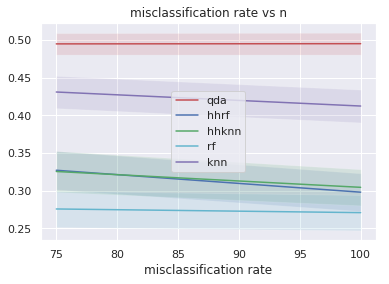

In [23]:
plot_errors(n, all_errors_norm, labels = ['qda', 'hhrf', 'hhknn', 'rf', 'knn'], png_title = 'true_normal')

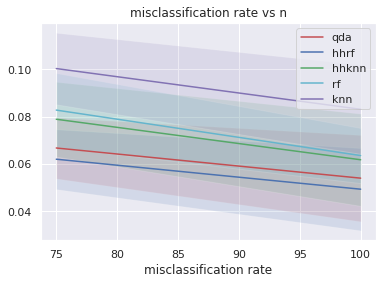

In [24]:
plot_errors(n, all_errors_sbm, labels = ['qda', 'hhrf', 'hhknn', 'rf', 'knn'], png_title = 'sbm')

In [5]:
counts = np.random.multinomial(200, [0.5, 0.5])
Z = beta_sampler(counts, beta_params)
A = sbm(counts, B)

import gcn

ModuleNotFoundError: No module named 'gcn'

In [28]:
print("%i"%(10*p))

6
